forza napoli

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [5]:
# parameters
DATA_PATH = '../../data/high_10m.parquet'
NUM_LAGS = 10
NUM_STOCKS = 10
TRAIN_WINDOW = 50
OUTPUT_PATH = '../../data/processed_high_10m_subset.parquet'
SEED = 42
SHRINKAGE_LIST = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


In [6]:
df = pd.read_parquet(DATA_PATH)
df.head()

df = df[df['RETURN'] != 0]

In [7]:
def describe_series(series):
    print("Description of", f"{series.describe()}:", sep="\n")
    print(f"Skew: {series.skew()}")
    print(f"Kurtosis: {series.kurtosis()}")

describe_series(df["RETURN"])

Description of
count    4.956055e+06
mean    -7.984415e-05
std      7.275080e-03
min     -3.551797e-01
25%     -1.791604e-03
50%      3.761661e-05
75%      1.697473e-03
max      7.381823e-01
Name: RETURN, dtype: float64:
Skew: 1.3913902867003332
Kurtosis: 198.65418550148047


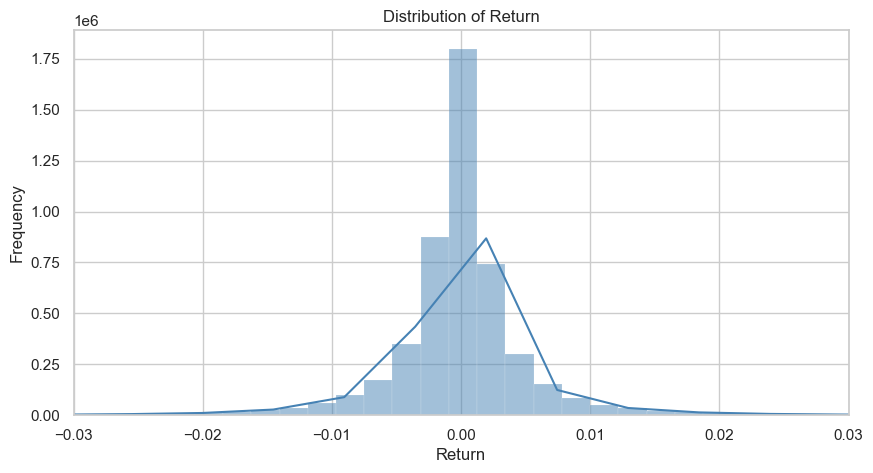

In [8]:
def plot_histogram_distribution(series, n_bins=500, left_limit = -0.03, right_limit = 0.03):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.histplot(series, kde=True, bins=n_bins, color="steelblue")
    plt.title("Distribution of Return")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.xlim(left_limit, right_limit) 
    plt.show()

plot_histogram_distribution(df["RETURN"])

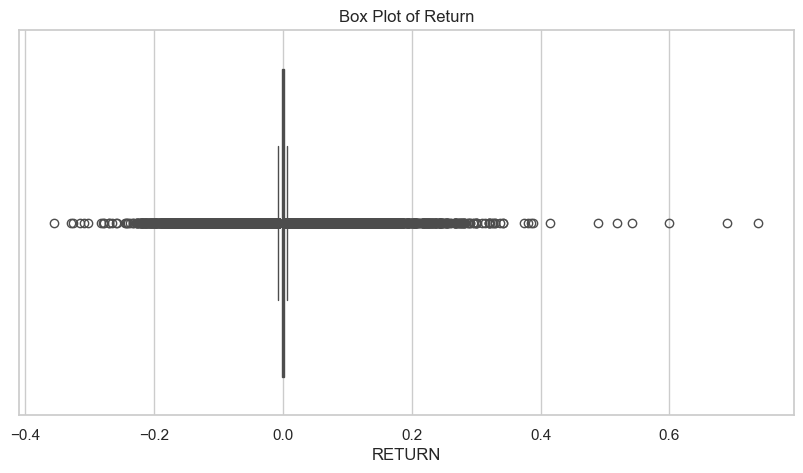

In [9]:
def plot_boxplot(series):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = series, color="orange")
    plt.title("Box Plot of Return")
    plt.show()

plot_boxplot(df["RETURN"])

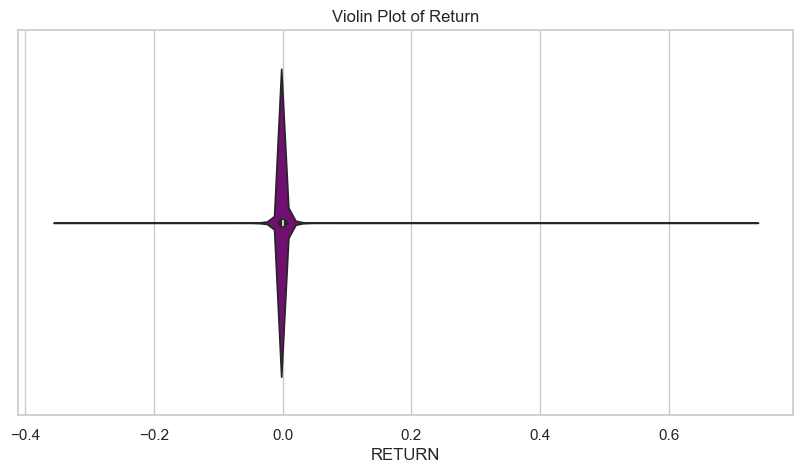

In [10]:
def plot_violin(series):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=series, color="purple")
    plt.title("Violin Plot of Return")
    plt.show()
    
plot_violin(df["RETURN"])

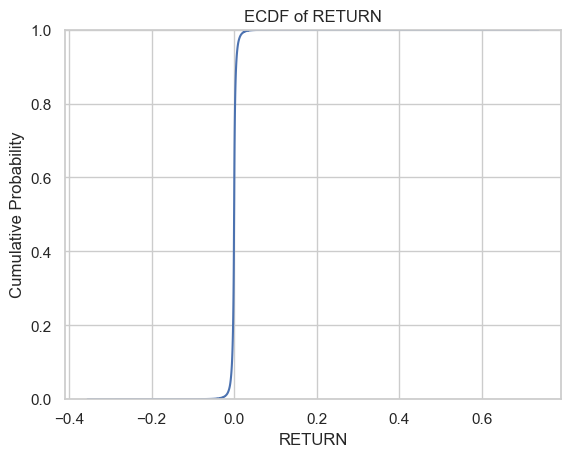

In [11]:
def plot_ecdf(series):
    sns.ecdfplot(series)
    plt.title("ECDF of RETURN")
    plt.xlabel("RETURN")
    plt.ylabel("Cumulative Probability")
    plt.show()

plot_ecdf(df["RETURN"])


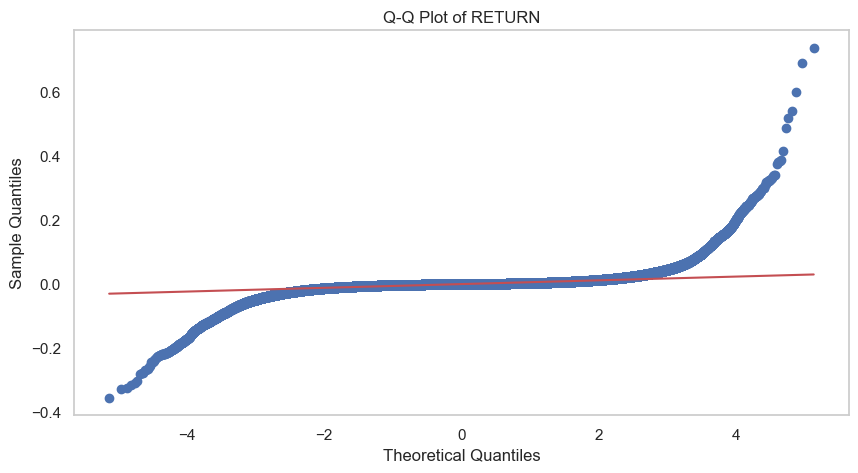

In [12]:
def plot_qq(series):
    plt.figure(figsize=(10, 5))
    stats.probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RETURN")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid()
    plt.show()

plot_qq(df["RETURN"])

In [13]:
def select_quantiles(series, lower_bound=0.01, upper_bound=0.99):
    quantile_values = series.quantile([lower_bound, upper_bound])
    return quantile_values

def select_winsorized(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = select_quantiles(series, lower_percentile, upper_percentile).iloc[0]
    upper_bound = select_quantiles(series, lower_percentile, upper_percentile).iloc[1]
    selected_df = df[(df["RETURN"] >= lower_bound) & (df["RETURN"] <= upper_bound)]
    # winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)
    return selected_df

winsorized_df = select_winsorized(df["RETURN"], 0.01, 0.99)


Description of
count    4.856971e+06
mean    -6.449153e-05
std      4.518062e-03
min     -2.035623e-02
25%     -1.731227e-03
50%      3.769034e-05
75%      1.643263e-03
max      1.941748e-02
Name: RETURN, dtype: float64:
Skew: -0.09510506084702941
Kurtosis: 3.601397058879437


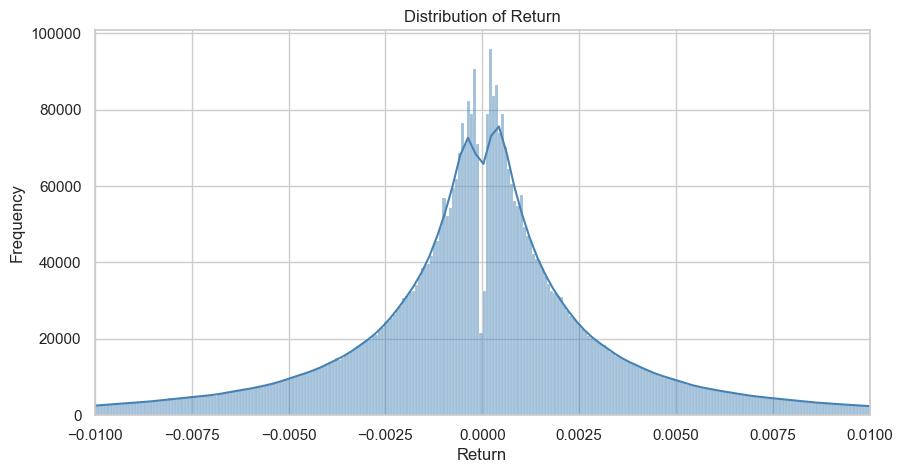

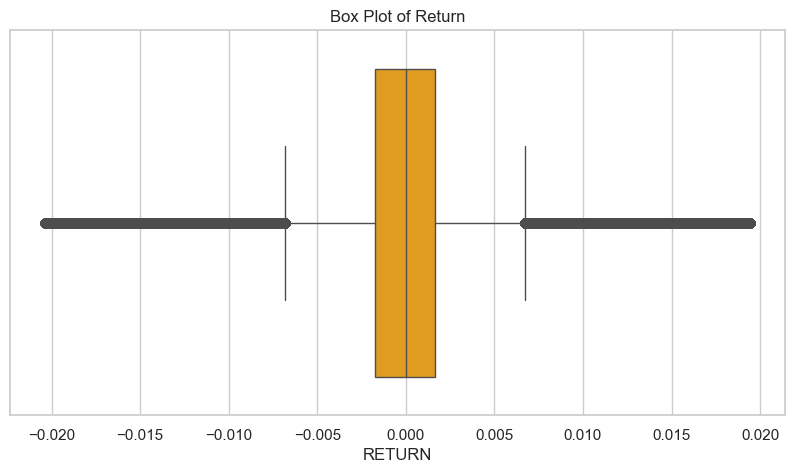

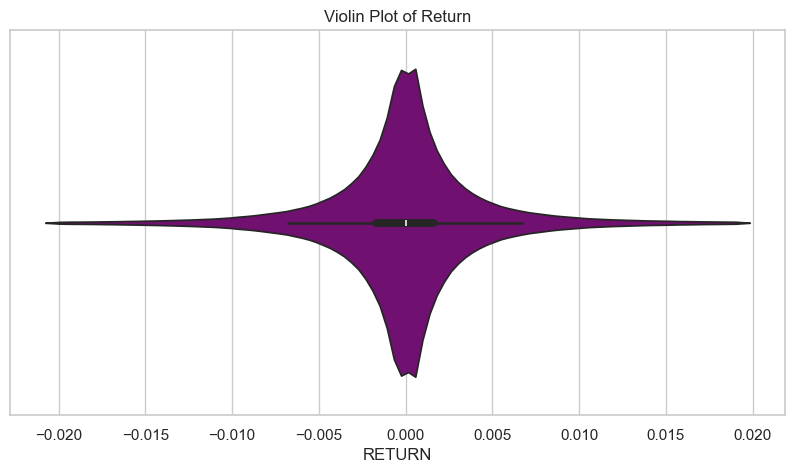

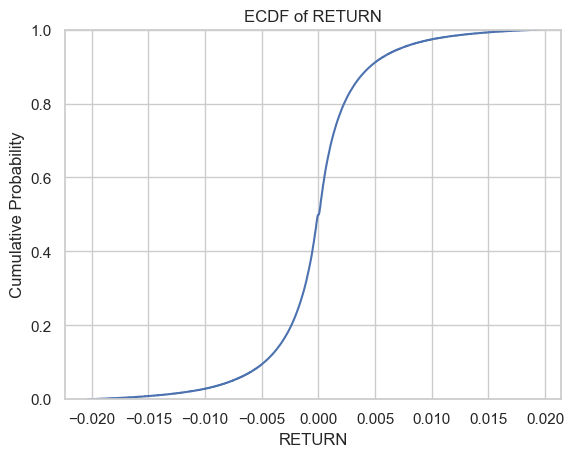

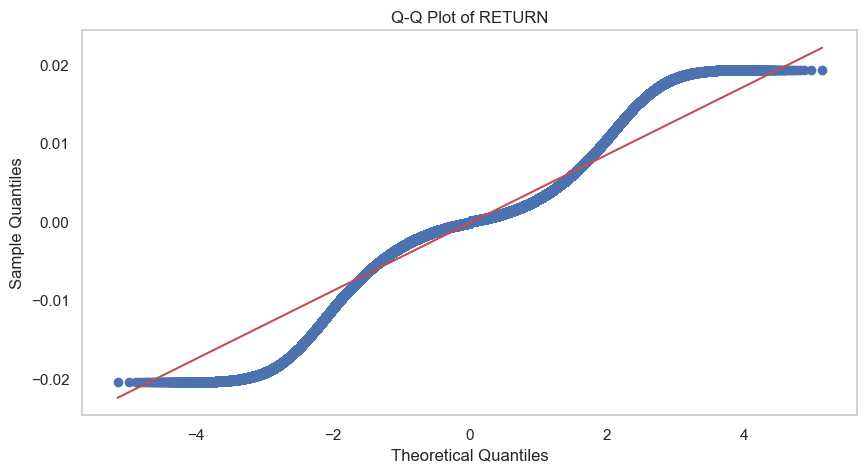

In [14]:
describe_series(winsorized_df["RETURN"])
plot_histogram_distribution(winsorized_df["RETURN"], n_bins=500, left_limit = -0.01, right_limit = 0.01)
plot_boxplot(winsorized_df["RETURN"])
plot_violin(winsorized_df["RETURN"])
plot_ecdf(winsorized_df["RETURN"])
plot_qq(winsorized_df["RETURN"])